In [59]:
#Importing

import mal_scraper as mal
from mal_scraper import GetTop
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [60]:
#Importing dataframe from csv
df = pd.read_csv(r'C:\Users\micha.DESKTOP-U2HVTMF\MyPythonScripts\Jupyter\MAL Scraping\mal-scraping\mal_cleaned.csv')
df.head()

,Score Rank,Title,User Rank,User Rating,Popularity Ranking,Episode Count,Episode Runtime,End Date,Time to Watch,Studios,Genres,Status
0,1,Fullmetal Alchemist: Brotherhood,1,9.191,"2,265,241",64,24,2010,25.60,['Bones'],"['Action', 'Military', 'Adventure', 'Comedy', ...",Finished Airing
1,2,Shingeki no Kyojin: The Final Season,2,9.161,"775,481",16,23,2020,6.13,['MAPPA'],"['Action', 'Military', 'Mystery', 'Super Power...",Currently Airing
2,3,Shingeki no Kyojin Season 3 Part 2,3,9.111,"1,110,912",10,23,2019,3.83,['Wit Studio'],"['Action', 'Drama', 'Fantasy', 'Military', 'My...",Finished Airing
3,4,Steins;Gate,4,9.111,"1,795,409",24,24,2011,9.60,['White Fox'],"['Thriller', 'Sci-Fi']",Finished Airing
4,5,Gintama°,5,9.101,"409,268",51,24,2016,20.40,['Bandai Namco Pictures'],"['Action', 'Comedy', 'Historical', 'Parody', '...",Finished Airing


In [61]:
#Fixing Populartiy Ranking
df['Popularity'] = df['Popularity Ranking'].apply(lambda x: int(x.replace(',', '')))
df.head()

,Score Rank,Title,User Rank,User Rating,Popularity Ranking,Episode Count,Episode Runtime,End Date,Time to Watch,Studios,Genres,Status,Popularity
0,1,Fullmetal Alchemist: Brotherhood,1,9.191,"2,265,241",64,24,2010,25.60,['Bones'],"['Action', 'Military', 'Adventure', 'Comedy', ...",Finished Airing,2265241
1,2,Shingeki no Kyojin: The Final Season,2,9.161,"775,481",16,23,2020,6.13,['MAPPA'],"['Action', 'Military', 'Mystery', 'Super Power...",Currently Airing,775481
2,3,Shingeki no Kyojin Season 3 Part 2,3,9.111,"1,110,912",10,23,2019,3.83,['Wit Studio'],"['Action', 'Drama', 'Fantasy', 'Military', 'My...",Finished Airing,1110912
3,4,Steins;Gate,4,9.111,"1,795,409",24,24,2011,9.60,['White Fox'],"['Thriller', 'Sci-Fi']",Finished Airing,1795409
4,5,Gintama°,5,9.101,"409,268",51,24,2016,20.40,['Bandai Namco Pictures'],"['Action', 'Comedy', 'Historical', 'Parody', '...",Finished Airing,409268


In [62]:
df.describe()

,Score Rank,User Rank,User Rating,Episode Count,Episode Runtime,End Date,Time to Watch,Popularity
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,4.900000e+01
mean,25.653061,28.183673,8.845286,33.020408,45.632653,2011.959184,13.582245,6.729435e+05
std,14.687794,22.422713,0.164279,51.513546,39.020664,8.051809,20.403359,5.352128e+05
min,1.000000,1.000000,8.431000,1.000000,22.000000,1981.000000,1.380000,3.061400e+04
25%,13.000000,14.000000,8.721000,4.000000,24.000000,2009.000000,2.250000,2.242340e+05
50%,26.000000,24.000000,8.821000,14.000000,24.000000,2014.000000,5.600000,6.230250e+05
75%,38.000000,40.000000,8.961000,26.000000,30.000000,2018.000000,10.400000,8.869690e+05
max,50.000000,138.000000,9.191000,201.000000,135.000000,2021.000000,80.400000,2.265241e+06


Ep Count and time to watch seem to have the most relevant info: ~33 episodes,  13 hours to watch. Mean episode runtime slightly inflated because of movies.

In [63]:
df.columns

Index(['Score Rank', 'Title', 'User Rank', 'User Rating', 'Popularity Ranking',
       'Episode Count', 'Episode Runtime', 'End Date', 'Time to Watch',
       'Studios', 'Genres', 'Status', 'Popularity'],
      dtype='object')

<AxesSubplot:>

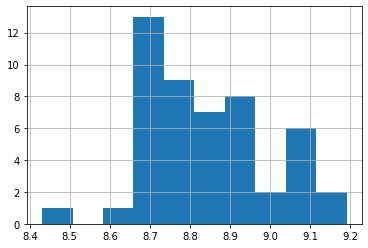

In [64]:
df['User Rating'].hist()

Quick and dirty hist shows that the distribution is skewed right - makes sense when analyzing the top 50 shows. All shows would likley show something closer to a normal distribution

<AxesSubplot:>

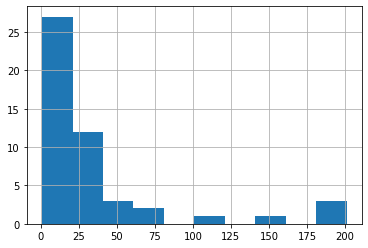

In [65]:
df['Episode Count'].hist()

Looks like most shows are between 0-50: makes sense, seasonals usually go from 12-25. The spike at the 175-200 count is pretty interesting, means that there's a couple of popular long-running shows.

<AxesSubplot:>

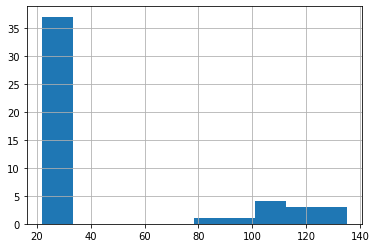

In [66]:
df['Episode Runtime'].hist()

This also is pretty intuitive: most shows are episodic and between 20-30 minsutes, and then there's some movies.

<AxesSubplot:>

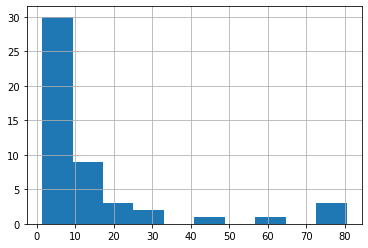

In [67]:
df['Time to Watch'].hist()

Looks like most shows take between 0-10 hours to finish, makes sense that this is very similar to the Episode Count graph considering that most shows are episodic

<AxesSubplot:>

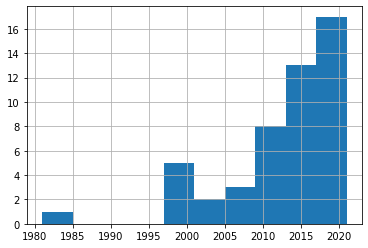

In [68]:
df['End Date'].hist()

Pretty interesting how the amount of shows that make it into the top 50 increase over time. Wonder what can be attributed to the spike of shows in the 2000s before the upward trend starts: perhaps something like nostalgia?

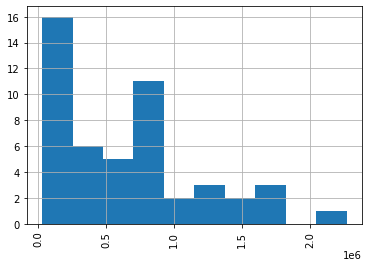

In [69]:
df['Popularity'].hist()
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:>

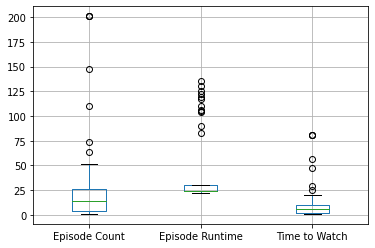

In [70]:
df.boxplot(column = ['Episode Count', 'Episode Runtime', 'Time to Watch'])

<AxesSubplot:>

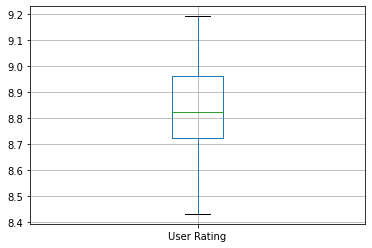

In [71]:
df.boxplot(column='User Rating')

<AxesSubplot:>

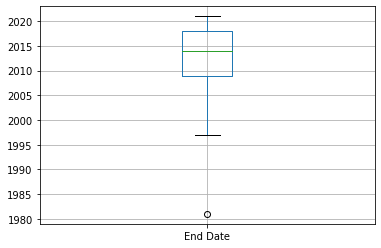

In [72]:
df.boxplot(column='End Date')

The boxplots represent the same things as the histograms but some outliers can be seen more clearly.

In [73]:
df[['User Rating', 'Episode Count', 'Episode Runtime', 'Time to Watch', 'User Rank', 'Popularity']].corr()

,User Rating,Episode Count,Episode Runtime,Time to Watch,User Rank,Popularity
User Rating,1.000000,0.326303,-0.113564,0.327111,-0.884719,0.378839
Episode Count,0.326303,1.000000,-0.351369,0.999008,-0.247931,0.169211
Episode Runtime,-0.113564,-0.351369,1.000000,-0.322914,0.023009,0.006725
Time to Watch,0.327111,0.999008,-0.322914,1.000000,-0.250626,0.162903
User Rank,-0.884719,-0.247931,0.023009,-0.250626,1.000000,-0.216971
Popularity,0.378839,0.169211,0.006725,0.162903,-0.216971,1.000000


<AxesSubplot:>

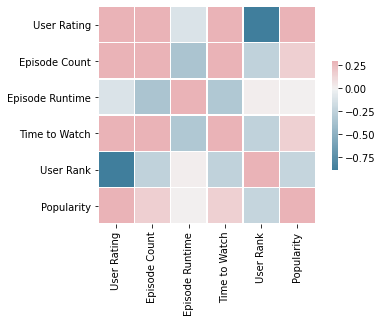

In [85]:
cmap = sns.diverging_palette(230, 10, as_cmap=True)
sns.heatmap(df[['User Rating', 'Episode Count', 'Episode Runtime', 'Time to Watch', 'User Rank', 'Popularity']].corr(), cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Strongest negative correlation is between rank and rating: intuitive, rank is based off of rating. Some other interesting correlations are user ratings vs popularity, episode count, time to watch. One possible reasoning can simply be that the ratings are only calculated once a user has marked a certain proportion of the show as completed, and this list only contains the top shows.

Next, creating bar plots for the categorical variables and their value counts

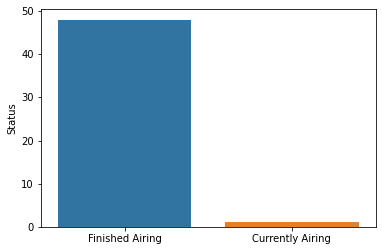

In [90]:
sns.barplot(x=df['Status'].value_counts().index, y=df['Status'].value_counts())
plt.show()

In [126]:
#Splitting apart studios/genres
#TODO: Split together genre/studio entries from string to list and then by studio

import re

def mergeList(dfcol):
    '''Returns a list with all of the values from a list of lists'''
    newList = []
    for dataList in dfcol:
        lists = re.findall('\w+', dataList)
        print(lists)
        # if len(dataList) > 1:
        #     for item in dataList:
        #         newList.append(item)
        # else:
        #     newList.append(dataList)

studioList = mergeList(df['Genres'])
print(studioList)

# sns.barplot(x=studioList, y=df['Studios'].value_counts())
# plt.xticks(rotation = 90)
# plt.show()

['Action', 'Military', 'Adventure', 'Comedy', 'Drama', 'Magic', 'Fantasy', 'Shounen']
['Action', 'Military', 'Mystery', 'Super', 'Power', 'Drama', 'Fantasy', 'Shounen']
['Action', 'Drama', 'Fantasy', 'Military', 'Mystery', 'Shounen', 'Super', 'Power']
['Thriller', 'Sci', 'Fi']
['Action', 'Comedy', 'Historical', 'Parody', 'Samurai', 'Sci', 'Fi', 'Shounen']
['Action', 'Adventure', 'Fantasy', 'Shounen', 'Super', 'Power']
['Military', 'Sci', 'Fi', 'Space', 'Drama']
['Action', 'Comedy', 'Historical', 'Parody', 'Samurai', 'Sci', 'Fi', 'Shounen']
['Action', 'Comedy', 'Historical', 'Parody', 'Samurai', 'Sci', 'Fi', 'Shounen']
['Drama', 'Game', 'Seinen', 'Slice', 'of', 'Life']
['Drama', 'School', 'Shounen']
['Action', 'Comedy', 'Historical', 'Parody', 'Samurai', 'Sci', 'Fi', 'Shounen']
['Slice', 'of', 'Life', 'Comedy', 'Supernatural', 'Drama', 'Romance']
['Action', 'Comedy', 'Historical', 'Parody', 'Samurai', 'Sci', 'Fi', 'Shounen']
['Action', 'Sci', 'Fi', 'Comedy', 'Historical', 'Parody', 'Sam